In [37]:
%pylab inline
from sklearn import linear_model, neighbors
from scipy.signal import savgol_filter

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Function for calculating the error of a linear model over a set of points.
def lr_error(model, points, labels):
    pred_labels = model.predict(points)
    wrong_preds = 0
    for i in range(len(labels)):
        if (labels[i] == 1 and pred_labels[i] < 0.5) or (labels[i] == 0 and pred_labels[i] >= 0.5):
            wrong_preds = wrong_preds + 1
    return wrong_preds*100/len(points)

# Function for calculating the error of nearest neighbors classifier over a set of points.
def nn_error(model, points, labels):
    pred_labels = model.predict(points)
    wrong_preds = 0
    for i in range(len(labels)):
        if labels[i] != pred_labels[i]:
            wrong_preds = wrong_preds + 1
    return wrong_preds*100/len(points)

In [3]:
# Parameters for generated data.
blue_mean = [1, 0]
orange_mean = [0, 1]
cov_matrix = [[1, 0], [0, 1]]

In [4]:
# Generates training set.
training_blue_x, training_blue_y = random.multivariate_normal(blue_mean, cov_matrix, 100).T
training_blue_points = column_stack((training_blue_x, training_blue_y))

training_orange_x, training_orange_y = random.multivariate_normal(orange_mean, cov_matrix, 100).T
training_orange_points = column_stack((training_orange_x, training_orange_y))

training_points = concatenate((training_blue_points, training_orange_points))

# Generates test set.
test_blue_x, test_blue_y = random.multivariate_normal(blue_mean, cov_matrix, 5000).T
test_blue_points = column_stack((test_blue_x, test_blue_y))
                                
test_orange_x, test_orange_y = random.multivariate_normal(orange_mean, cov_matrix, 5000).T
test_orange_points = column_stack((test_orange_x, test_orange_y)) 
                                  
test_points = concatenate((test_blue_points, test_orange_points))

In [5]:
# Generates output labels.
training_num_labels = concatenate(
    ([0 for x in range(len(training_blue_x))], [1 for x in range(len(training_orange_x))]))
test_num_labels = concatenate(
    ([0 for x in range(len(test_blue_x))], [1 for x in range(len(test_orange_x))]))

In [13]:
# Uses a LinearRegression model.
lr = linear_model.LinearRegression()
lr_model = lr.fit(training_points, training_num_labels)

In [22]:
# Calculates error for the LinearRegression model.
lr_deg_freedom = 3
training_lr_error = lr_error(lr_model, training_points, training_num_labels)
test_lr_error = lr_error(lr_model, test_points, test_num_labels)

In [31]:
# Uses a KNeighborsClassifier classifier with different numbers of neighbors.
training_nn_error = []
test_nn_error = []
nn_deg_freedom = []
for k in range(200):
    # Trains model.
    knc = neighbors.KNeighborsClassifier(200-k, weights="uniform") 
    knc_model = knc.fit(training_points, training_num_labels)
    #Gets errors.
    training_nn_error.append(nn_error(knc_model, training_points, training_num_labels))
    test_nn_error.append(nn_error(knc_model, test_points, test_num_labels))
    nn_deg_freedom.append(200/(200-k))    

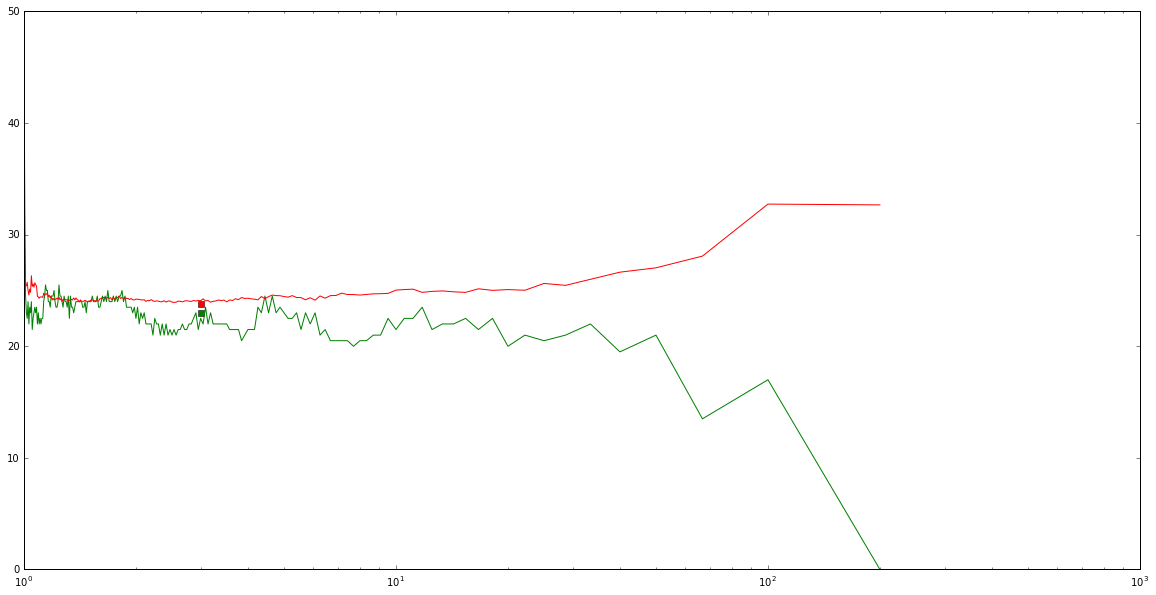

In [38]:
# Plots the errors
figure(figsize=(20, 10))
plot(lr_deg_freedom, training_lr_error, marker='s', color='green')
plot(lr_deg_freedom, test_lr_error, marker='s', color='red')
semilogx(nn_deg_freedom, training_nn_error, marker='', color='green')
semilogx(nn_deg_freedom, test_nn_error, marker='', color='red')